# Few Shot Learning Tutorial
## GRAD-E1394 Deep Learning -- Assignment 3

Author(s):
*   Jiayu Yang, J.Yang@students.hertie-school.org
*   Santiago Sordo Ruz, santiago.sordo@students.hertie-school.org
*   Danial Riaz, d.riaz@students.hertie-school.org

Data limitation is a key concern for most public policy practioners. Due to resource limitations and privacy concerns, there is seldom enough data to incorporate most deep learning models. This tutorial serves as a guide for how even with limited data, and making use of Few Shot Learning (FSL) policy practioners can achieve similar (sometimes even better!) results than standard ML and DL based models. 

We provide a brief theoretical explanation for what FSL is and then introduce two practical demonstrations of models that utilize FSL, namely Mistral 7B and SetFit. We compare both the computational intensity and model accuracy of FSL models with models based on traditional Machine Learning and Deep Learning techniques. 


# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Methodology](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="memo"></a>
# Memo

Deep Learning depends upon using large amounts of labelled examples to iteratively update high-capacity models. This type of optimization breaks down in the small data regime where we want to learn from very few labelled examples. Policy makers therefore often feel limited in making use of deep learning models in their work because they work in an environment where they often don't have; 
1) computationally intensive equipment, 
2) large resources of human labour who could perform streneous labelling tasks, 
3) financial costs associated with large volumens of data collection or even 
4) freedom in using sensitve data due to concerns on privacy and security
With Few-Shot Learning (FSL), policy analysts can train models with only a handful of example data and incorporate these tools to enhance decision-making processes with efficiency and accuracy.

There are many real world examples of successful application of FSL in public policy. Some examples are;

1) Image Detection: FSL for COVID-19 lung X-ray detection offers a practical and efficient solution for hospitals and healthcare systems facing challenges associated with limited labeled data. By leveraging FSL techniques, the model can adapt swiftly to emerging conditions, contributing to timely and accurate identification of COVID-19 cases from chest X-rays.

2) Speech Detection: In disaster management, a FSL model can be trained to recognize emergency commands from various dialects with minimal labeled samples. This allows for efficient communication in diverse communities during crises, aiding first responders in quick and accurate coordination.

3) Text Classification: FSL can be utilized to adapt quickly to changing public sentiment with minimal labeled examples. This aids governments in gauging public reactions to policies in real-time, allowing for responsive adjustments.

In this tutorial we will look into an example of the third example, namely an application of text classification for labelling 1000s of publications based upon pre-defined labels. 


Organizations and Governments Utilizing Few-Shot Learning:

[National Aeronautics and Space Administration (NASA)](https://ntrs.nasa.gov/api/citations/20210026119/downloads/TM-20210026119.pdf):
NASA employs few-shot learning for analyzing data from space missions, enabling rapid identification of anomalies or discoveries with limited examples. 

[National Institute of Health](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9745688/):
Detecting COVID-19 condition in Chest X-Ray images using Few-Shot learning 


<a name="overview"></a>
# Overview

In this tutorial we will give an overview of using Few-Shot Learning for text classifications utilizing two models; SetFit and Mistral-7b and compare their perfomance with a machine learning model; OneVsRestClassifier as well as well as a standard Deep Learning, transformed based, model; ClimateBert. We will use a pre-labelled dataset here containing about 2500 climate related publications that were manually examined and classified into 5 labels. 


<a name="background-and-prereqs"></a>
# Background & Prerequisites

This tutorial assumes a basic understanding of the below topics from the user. If you are unfamiliar with these, we propose that you do a quick google search of what they mean. 

1. **Supervised Learning:** Understanding the basics of supervised learning is crucial. The application of Few-shot learning in our tutorial builds upon supervised learning principles where the model learns from labeled examples.

2. **Neural Networks:** Familiarity with neural networks, their architectures, and how they learn hierarchical representations is fundamental. Few-shot learning may involve modifying or extending neural network architectures. In general, understanding CNNs are useful for image-related tasks and RNNs for sequence-based tasks. Few-shot learning may leverage these architectures for specific domains.

3. **Transfer Learning:** Understanding the concept of transfer learning is key. Few-shot learning often involves transferring knowledge from a pre-trained model to a new task with limited labeled data.

4. **Feature Extraction:** Appreciating the idea of feature extraction and representation learning is important. Few-shot learning models may need to extract meaningful features from limited examples.

5. **Metric Learning:** Knowledge of metric learning, where the model learns a similarity metric between samples, is beneficial. Few-shot learning often involves metric-based approaches to assess similarity between examples.

6. **Evaluation Metrics:** Familiarity with different evaluation metrics, such as accuracy, precision, recall, and F1 score, is essential. These metrics are used to assess the performance of few-shot learning models.

7. **Gradient Descent and Optimization:** Knowing the basics of gradient descent and optimization algorithms is necessary. Few-shot learning models are trained using optimization techniques.

8. **Hyperparameter Tuning:** Awareness of hyperparameters and their impact on model performance is crucial. Few-shot learning models may require careful tuning of hyperparameters due to limited labeled examples.

9. **Validation Sets:** Comprehending the use of validation sets during model training is important. Few-shot learning models benefit from validation sets to fine-tune parameters.

10. **Contrastive pre-training** Contrastive pretraining is a self-supervised learning technique that involves training a model to distinguish between pairs of data points. Specifically, the model is trained to differentiate between a “positive” pair (i.e., two data points that are semantically similar) and a “negative” pair (i.e., two data points that are semantically dissimilar). By training the model in this way, it can learn to extract features that are sensitive to the semantic content of the data.

11. **Meta-learning/In-context learning** Meta-learning involves training a model to acquire fundamental skills, such as pattern recognition, during its training phase which allows it to rapidly adapt to new tasks during the inference phase.

## Useful video tutorials

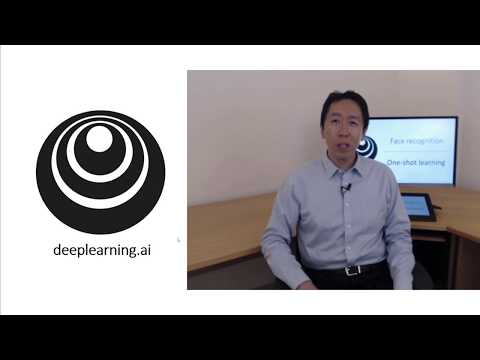

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('96b_weTZb2w')


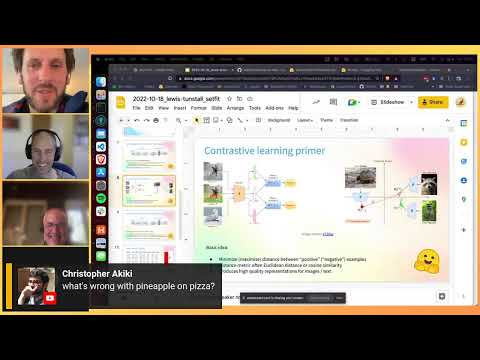

In [9]:
# using Few-Shot Learning with SetFit
YouTubeVideo('8h27lV8v8BU')

## Reading materials


**General Reading on Few Shot Learning**

[Prompt Engineering and Zero-Shot/Few-Shot Learning](https://www.inovex.de/de/blog/prompt-engineering-guide/)

[Large Language Models are Zero-Shot Reasoners](https://arxiv.org/abs/2205.11916)

[Large Language Models as Optimizers](https://arxiv.org/abs/2309.03409)

**SetFit:**

[Efficient Few-Shot Learning Without Prompts](https://doi.org/10.48550/arXiv.2209.11055)

[Sentence Embeddings using Siamese BERT-Networks](https://aclanthology.org/D19-1410/) 

**Mistral 7b:**

[Blog Post on Mistral](https://mistral.ai/news/announcing-mistral-7b/)

[Mistral 7B](arXiv:2310.06825v1)

**Label Classification using ML:** 

[Application of ML based classification for Climate Polocy](https://assets.researchsquare.com/files/pex-1910/v1/469059ba-3218-4fb6-9993-6568bf09a98f.pdf?c=1661517519)

<a name="data-description"></a>
# Data Description

The dataset used in our tutorial is sourced from [Hugging Face](https://huggingface.co/datasets/dspoka/ccai-nlp-tutorial-1) 

It uses a sub-set of data from [OpenAlex](https://openalex.org/works?sort=cited_by_count%3Adesc&column=display_name,publication_year,type,open_access.is_oa,cited_by_count) that was seen and labelled into 5 labels by [M.Callaghan et. al.](https://www.nature.com/articles/s41558-021-01168-6.epdf?sharing_token=7Sw0J3PwoQNKriW6TbOuX9RgN0jAjWel9jnR3ZoTv0PwAcRfhcoupIk0A95eY8_-YUKjuCHE46BRE8RXMy_HNaRNTl48Ji0i6-pYLEd3WbQwXQpTp1LscjrMM5Am67huate7yo35BOmH8Yq08b_CuYEhHpq1-SwJh0A5XD6kKvE%3D)

- Each row in the dataset corresponds to an academic paper and has some columns with metadata like the publication year, list of authors, etc. The main columns that we used were:
    - 'abstract' and the 'title' which is string text.
    - A unique identifier called 'id'.
    - And some metadata like 'publication_year', 'authors', 'doi'.

- Additionally, 5 labels were used in categorizing the publications:
    - Coastal and marine Ecosystems
    - Human and managed
    - Mountains, snow and ice	
    - Rivers, lakes, and soil moisture	
    - Terrestrial ES



## Data Acquisition

The data was obtained from Hugging Face and can be downloaded with the following code:

In [ ]:
from huggingface_hub import hf_hub_download

# Here we will download the openalex dataset from the huggingface hub.
filepath = hf_hub_download(repo_id="dspoka/ccai-nlp-tutorial-1", filename="openalex_data.csv", repo_type="dataset")
with open(filepath) as f:
    unlabeled_data = pd.read_csv(f)


print(f'The dataset has {unlabeled_data.shape[0]} rows and {unlabeled_data.shape[1]} columns')
print(f'The columns are: {unlabeled_data.columns.values}')
unlabeled_data.head()

In [ ]:
filepath = hf_hub_download(repo_id="dspoka/ccai-nlp-tutorial-1", filename="labelled_data.csv", repo_type="dataset")
with open(filepath) as f:
    df = pd.read_csv(f)

# We create a lower case version of the title without spaces and punctuation, to allow for merging
df["title_lcase"] = df["title"].apply(lambda x: re.sub("\W", "", x).lower() if isinstance(x, str) else x)

# We also want to get rid of documents without abstracts, as we can't use these for learning
df = df.dropna(subset=["abstract"])
print(df.shape)

df.drop(['title_lcase'], axis=1, inplace=True)
df.rename(columns={'12 - Coastal and marine Ecosystems': 'Coastal and marine ecosystems',
                             '12 - Human and managed': 'Human and managed',
                             '12 - Mountains, snow and ice': 'Mountains, snow and ice',
                             '12 - Rivers, lakes, and soil moisture': 'Rivers, lakes, and soil moisture',
                             '12 - Terrestrial ES': 'Terrestrial ecosystems'}, inplace=True)
df.head()

## Data Preprocessing

The data processing is a liitle bit different depending on the model used hence please refer to individual .ipynb files of each model for additional details related to preprocessing. 

<a name="Model Implementation and Results"></a>
# Model Implementation

In this section we will briefly describe the 4 models that we will be implementing. 

4 models:
*   OneVsRestClassifier (Machine Learning-based classifier)
*   Climate Bert (a more powerful BERT-based NLP model)
*   Few-Shot Learning with Mistral 7B (FSL utilizing prompts)
*   Few-Shot Learning with SetFit (FSL without prompts)

For each of these the methodology and results are documented in separate workbooks which are linked below. 

## OneVsRestClassifier & ClimateBERT

[One-vs-the-rest](
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) (OvR) strategy involves training one classifier for each class, fitting it against all other classes. It's computationally efficient, needing only n_classes classifiers. The approach offers interpretability, as each class has a dedicated classifier. Examining these classifiers provides insights into each class. Widely used in multiclass classification, OvR is a default and fair choice due to its efficiency and interpretative advantages.

A more powerful way to do classification is to fine-tune a langauge model which has been pretrained on large amounts of text. The [Transformers](https://huggingface.co/docs/transformers) library makes doing this really easy, and there are a wealth of models available with different features and which have been pretrained on different corpora. We use [ClimateBert](https://huggingface.co/climatebert), which has undergone additional pretraining on texts from the climate domain.


[Link to Model Implementation and Results of OneVsRestClassifier & ClimateBERT](https://github.com/hertie-data-science-lab/assignment-3---tutorial-few-shot-learning/blob/main/ML%26DL_methods.ipynb)

## Few-Shot Learning with Prompts: Mistral 7B

[Mistral 7B](arXiv:2310.06825v1) is an open source LLM. In an era where collaboration and customization are prized, an open-source (large) language model offers unparalleled flexibility. Developers and organizations can harness the full potential of Mistral-7B, modify it to suit their unique needs, and build custom AI applications without any restrictive barriers.
With open-source access, Mistral-7B empowers a wide spectrum of applications, ranging from customer service chatbots that understand nuanced conversations to code generation tools that enhance the software development process.

Compared to other LLMs like Llama 2 developed by Meta:
1.	Efficiency Over Size: Mistral-7B demonstrates that bigger isn't always better. With a focus on efficiency and effective parameter utilization, this compact large language model consistently delivers superior results, often surpassing the larger Llama 2 model in various benchmarks.
2.	Cost-Effectiveness: Smaller, more efficient models like Mistral-7B present cost-effective alternatives for businesses and organizations looking to deploy high-performing large language models. This is particularly attractive in scenarios where budget constraints are a consideration.
3.	In addition, Mistral-7B doesn't stop at performance and efficiency; it also emphasizes responsible AI usage through its system prompts, which allow users to enforce content constraints, ensuring safe and ethical content generation. Its ability to classify and moderate content makes it a valuable tool for maintaining quality and safety in various applications.


[Link to Model Implementation and Results of Mistral 7B](https://github.com/hertie-data-science-lab/assignment-3---tutorial-few-shot-learning/blob/main/Mistral-7B_Few-shot-Learning.ipynb)

## Few-Shot Learning without Prompts: SetFit

[SetFit](https://arxiv.org/abs/2209.11055) eliminates the need for prompts or verbalisers in few-shot fine-tuning, generating rich embeddings directly from a small number of labeled text examples. It achieves high accuracy without requiring large-scale models like T0 or GPT-3, making it significantly faster for both training and inference. SetFit is compatible with any Sentence Transformer on the Huggnig Face Hub.

SetFit prioritizes efficiency and simplicity, employing a two-step process;

1) Initially, it fine-tunes a Sentence Transformer model on a few labeled examples (typically 8 or 16 per class). This involves contrastive training, creating positive and negative pairs for in-class and out-class selection. The model generates dense embeddings per example. 
2) In the second step, a classifier head trains on these embeddings with respective class labels. During inference, an unseen example goes through the fine-tuned Sentence Transformer, producing an embedding that, when processed by the classification head, yields a predicted class label. This approach leverages the Sentence Transformer's ability to generate meaningful embeddings based on paired sentences.

SetFit builds on Sentence Transformers, adapting **pretrained transformer models** with **Siamese and triplet networks** for meaningful sentence embeddings. The aim is to **minimize distance between similar sentences** and maximize it for dissimilar ones. Standard Sentence Transformers yield fixed, dense vectors, ideal for machine learning applications. SetFit utilizes these embeddings to efficiently address machine learning tasks, emphasizing semantic relationships and optimizing distances between sentences.

[Link to Model Implementation and Results of SetFit](https://github.com/hertie-data-science-lab/assignment-3---tutorial-few-shot-learning/blob/main/setfit.ipynb)


![Summary of Comparative Results](Comparative_Results_Table.png)

Please note that this image may not show when viewing on GitHub in which case please see Comparative_Results.png in our repository

## Observation and Limitations

From the initial project conception and expectations, to the final code practice process and results, we have too high expectations of LLM, prompt engineering is a real art need to invest a lot of time to study and learn; OneVsRestClassifier, a machine learning algorithm, performs much better than we expected, and at the same time the code writing is also The performance of ClimateBERT and SetFit is in line with the research we did and our expectations, the code is moderately difficult to write, easy to optimize, and very efficient. However, we still see the unlimited potential of open-source LLM, and we imagine many practical applications of mature multimodal LLM and public policy and government agencies in the future. The new EU AI Act also has a lot to say about open source models, so let's look forward to the future together.

To conclude this tutorial, there are some limitations that need to be emphasized:

**Reduced Training Data:** This tutorial made use of a dataset which is relatively small (1266 observations of labelled data) for educational purposes, deviating from the real-world scenario where comprehensive datasets are often much larger in terms of size and classifications. This simplification is made to facilitate quicker training times and ease of understanding.

**Performance Considerations:** Real-world applications demand more challenging performance considerations which we haven't taken into account. Achieving optimal results often requires extensive fine-tuning, hyperparameter tuning, and larger-scale datasets than what we have shown.

**Fairness and Societal Impact:** Few-shot learning models, if applied naively, may inherit biases present in the training data. Readers should consider the ethical implications of deploying such models, especially in critical domains like healthcare or finance, and take steps to mitigate biases to avoid potential negative societal impacts.

**Awareness and Evaluation:** Readers are encouraged to critically evaluate their datasets for potential biases and to be aware of the societal implications of deploying AI models. It is essential to actively seek out and address biases, especially when deploying models in sensitive applications.

**Hallucinations of Mistral-7B and some potential reasons:**

As we mentioned in the Mintral-7B file, when we provided the original abstracts for each paper and let it run, we encountered issues where the model's output deviates from the expected prompt instructions, resulting in verbose and irrelevant content  (which we attributed to the model's hallucinations) and putting a lot of load on the GPU.

There are several potential reasons for this behavior:

1. Token Limitation: LLMs have a maximum token limit for each input sequence. Mistral-7B, like other models, can only process a certain number of tokens at a time. If an abstract exceeds this limit, the model won't be able to consider the entire text, which can lead to truncated inputs and consequently, incomplete understanding of the content.

2. Complexity and Length of Abstracts: Academic abstracts are often dense and packed with specialized terminology and complex sentence structures. This complexity can make it difficult for the model to extract the main points and generate a succinct classification.

3. Prompt Misalignment: If the prompt format doesn't align well with the pre-training of the LLM, it may not trigger the intended response. The model's training might not have covered similar tasks or the format of the prompt might be unfamiliar to the model.

4. Model's Pre-training Bias: The model's responses are influenced by its pre-training data. If the pre-training data did not include similar tasks or enough examples of abstract classification, the model might not perform well on this task.

5. Overwhelming Model with Information: Providing too much information in a single prompt can overwhelm the model, leading it to generate outputs that don't focus on the classification task at hand.

All these issues should be emphasized in the future and given sufficient attention in the training and development process, especially as it relates to the development of applications in the public domain.

## Congratulations towards completing this tutorial! 


Now consider which areas in the policy sector can you make use of text classification using Few-Shot Learning. Here are a few ideas to get you started: 

**Customized Sentiment Analysis for Policy Evaluation:**
Governments can utilize Few-Shot Learning to develop customized sentiment analysis models for evaluating public opinions on policy matters. This enables tailored insights into public sentiment, helping policymakers gauge the effectiveness of policies and make informed decisions.

**Adaptable Threat Detection in National Security:**
Few-Shot Learning can be applied to text classification for national security purposes. Governments can develop models to quickly adapt to evolving threats by using minimal labeled examples. This adaptability enhances the efficiency of threat detection systems and aids in national security efforts.

**Efficient Compliance Monitoring:**
Regulatory bodies can employ Few-Shot Learning to build text classification models for monitoring compliance with regulations and policies. These models can be fine-tuned with limited examples, offering an efficient way to identify potential non-compliance and streamline regulatory processes.

**Customized Information Extraction for Government Documents:**
Governments can benefit from Few-Shot Learning in text classification for information extraction from large volumes of government documents. This allows for the creation of custom models tailored to specific domains, improving document categorization, and enhancing information retrieval processes.

**Privacy-Preserving Text Analysis:**
Governments concerned about data privacy can leverage Few-Shot Learning to develop in-house language models tailored to specific tasks. This approach allows for text classification without relying on external commercial models, thereby ensuring greater control over sensitive government data.

**Localized Policy Understanding:**
Few-Shot Learning enables the development of models that can quickly adapt to understand localized dialects, languages, or policy nuances. This is particularly relevant for governments operating in multilingual and culturally diverse regions, ensuring accurate and context-aware text analysis.

**Cost-Efficient Public Service Communication:**
Governments can use Few-Shot Learning to enhance automated communication channels. This includes developing models for classifying citizen queries and concerns, allowing for cost-effective and timely responses, ultimately improving public service delivery.

**Fast Adaptation to Emerging Legislative Changes:**
Policymakers can employ Few-Shot Learning to quickly adapt text classification models to understand and categorize text related to emerging legislative changes. This ensures that automated systems can efficiently process and categorize new legal documents without extensive retraining.

You can use the code provided in this tutorial to already get started!

<a name="references"></a>
# References

*   [Mistral 7B](arXiv:2310.06825v1)
*   [Efficient Few-Shot Learning Without Prompts](https://doi.org/10.48550/arXiv.2209.11055)
*   [Prompt Engineering and Zero-Shot/Few-Shot Learning](https://www.inovex.de/de/blog/prompt-engineering-guide/)


## Acknowledgement

We acknowledge support from ChatGPT for some coding activities. We particularly thank Lynn Kack and fellow Deep Learning colleagues for their guidance on content-related matters. Finally, we are grateful to Max Callaghan for inspiring us to choose the chosen topic and for delivering an enlightening lecture on his 'Evidence Synthesis' work for Hertie Data Science students, enriching the learning experience.